In [ ]:
from fastai.vision.all import *

# path = '/content/drive/MyDrive/Colab Notebooks/10.cj_project/datasets/img_cls/fm_img'
path = '/content/drive/MyDrive/Colab Notebooks/10.cj_project/datasets/img_cls/fm_img/good'

dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(460),
    batch_tfms=[*aug_transforms(size=224, max_warp=0), Normalize.from_stats(*imagenet_stats)]
)

dls = dblock.dataloaders(path)


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.9/dist-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,accuracy,time
0,0.000000,0.000000,1.000000,00:02
1,0.000000,0.000000,1.000000,00:02
2,0.000000,0.000000,1.000000,00:02
3,0.000000,0.000000,1.000000,00:02
4,0.000000,0.000000,1.000000,00:02


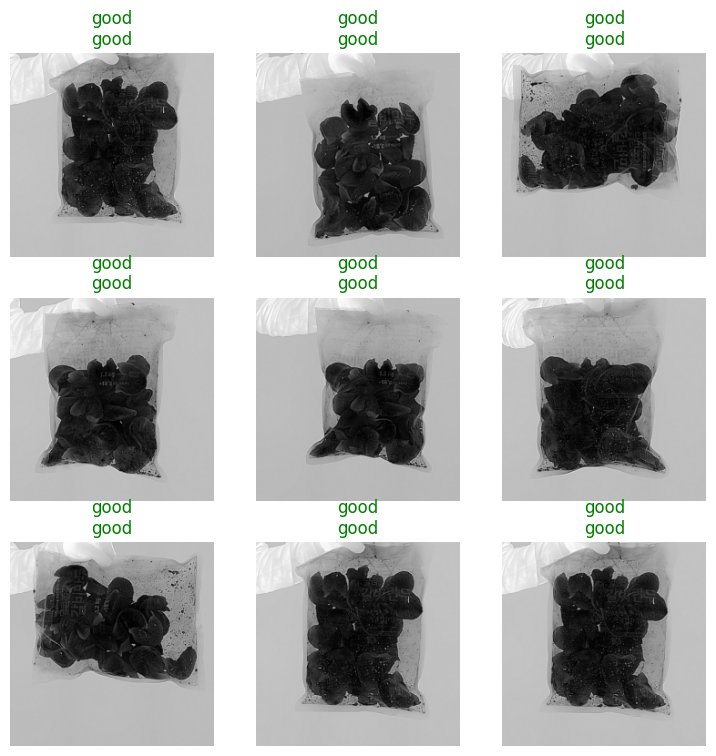

In [ ]:
learn = cnn_learner(dls, resnet18, metrics=accuracy)
thresh = 0.9
learn.fit_one_cycle(5, lr_max=1e-3)
learn.show_results()


In [ ]:
preds, _ = learn.get_preds(ds_idx=1)
probs = preds.max(1)[0]
threshold = probs.mean() * 0.9


In [ ]:
from PIL import Image

def is_anomaly(img_path, threshold):
    img = Image.open(img_path)
    img_tensor = dls.test_dl([img]).items[0]
    pred, _, _ = learn.predict(img_tensor)
    prob = pred.max()
    return prob < threshold

img_path = '/content/drive/MyDrive/Colab Notebooks/10.cj_project/datasets/img_cls/fm_img/ng/Snap-0002.jpg'
is_anomaly(img_path, threshold)

img_path = '/content/drive/MyDrive/Colab Notebooks/10.cj_project/datasets/img_cls/fm_img/ng/Snap-0263.jpg'
is_anomaly(img_path, threshold)


AttributeError: ignored

In [ ]:
from fastai.vision.all import *
import pandas as pd

path = '/content/drive/MyDrive/Colab Notebooks/10.cj_project/datasets/img_cls/fm_img'

# 이미지 경로를 불러와 pandas dataframe으로 변환
good_path = Path(path) / 'good'
ng_path = Path(path) / 'ng'

good_files = get_image_files(good_path)
ng_files = get_image_files(ng_path)

good_df = pd.DataFrame({'path': good_files, 'label': 0})
ng_df = pd.DataFrame({'path': ng_files, 'label': 1})

df = pd.concat([good_df, ng_df], ignore_index=True)

df.head()

,path,label
0,/content/drive/MyDrive/Colab Notebooks/10.cj_project/datasets/img_cls/fm_img/good/Snap-0105.jpg,0
1,/content/drive/MyDrive/Colab Notebooks/10.cj_project/datasets/img_cls/fm_img/good/Snap-0113.jpg,0
2,/content/drive/MyDrive/Colab Notebooks/10.cj_project/datasets/img_cls/fm_img/good/Snap-0106.jpg,0
3,/content/drive/MyDrive/Colab Notebooks/10.cj_project/datasets/img_cls/fm_img/good/Snap-0119.jpg,0
4,/content/drive/MyDrive/Colab Notebooks/10.cj_project/datasets/img_cls/fm_img/good/Snap-0118.jpg,0


In [ ]:

# DataBlock 생성
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_x=ColReader('path'),
    get_y=ColReader('label'),
    item_tfms=Resize(460),
    batch_tfms=[*aug_transforms(size=224, max_warp=0), Normalize.from_stats(*imagenet_stats)]
)

# DataLoaders 생성
dls = db

IsADirectoryError: ignored

/usr/local/lib/python3.9/dist-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pt

epoch,train_loss,valid_loss,accuracy,time
0,0.000000,0.000000,1.000000,00:09


epoch,train_loss,valid_loss,accuracy,time
0,0.000000,0.000000,1.000000,00:04
1,0.000000,0.000000,1.000000,00:04
2,0.000000,0.000000,1.000000,00:04
3,0.000000,0.000000,1.000000,00:03
4,0.000000,0.000000,1.000000,00:03
5,0.000000,0.000000,1.000000,00:04
6,0.000000,0.000000,1.000000,00:04
7,0.000000,0.000000,1.000000,00:03
8,0.000000,0.000000,1.000000,00:03
9,0.000000,0.000000,1.000000,00:04


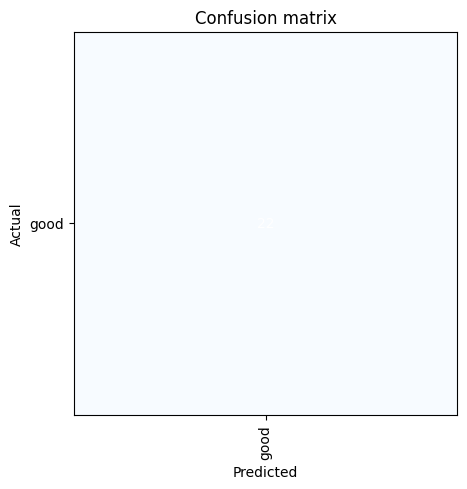

In [ ]:
from fastai.vision.all import *
import pandas as pd

# 이미지 경로와 라벨로 구성된 dataframe 생성
train_images_path = '/content/drive/MyDrive/Colab Notebooks/10.cj_project/datasets/img_cls/fm_img/good'
label_func = lambda x: x.parent.name
data = get_image_files(train_images_path)
df = pd.DataFrame({'path': data, 'label': list(map(label_func, data))})

# 데이터 블록 및 augmentation 설정
dblock = DataBlock(blocks=(ImageBlock, CategoryBlock),
                   splitter=RandomSplitter(valid_pct=0.2, seed=42),
                   get_x=ColReader('path'),
                   get_y=ColReader('label'),
                   item_tfms=Resize(224),
                   batch_tfms=aug_transforms())

# 데이터 로더 생성
dls = dblock.dataloaders(df, bs=16)

# 학습 모델 생성 및 학습
learn = cnn_learner(dls, resnet34, metrics=accuracy)
learn.fine_tune(10)

# 결과 및 혼동 행렬 출력
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()




In [ ]:

# 테스트 데이터 평가
test_path = '/content/drive/MyDrive/Colab Notebooks/10.cj_project/datasets/img_cls/anomaly'
test_files = get_image_files(test_path)
test_dl = dls.test_dl(test_files)
preds, _ = learn.get_preds(dl=test_dl)
pred_labels = [dls.vocab[i] for i in preds.argmax(dim=1)]

# 테스트 결과 출력
test_df = pd.DataFrame({'path': test_files, 'predicted_label': pred_labels})
print(test_df)

                                                                                                      path  \
0              /content/drive/MyDrive/Colab Notebooks/10.cj_project/datasets/img_cls/anomaly/Snap-0121.jpg   
1              /content/drive/MyDrive/Colab Notebooks/10.cj_project/datasets/img_cls/anomaly/Snap-0182.jpg   
2              /content/drive/MyDrive/Colab Notebooks/10.cj_project/datasets/img_cls/anomaly/Snap-0194.jpg   
3              /content/drive/MyDrive/Colab Notebooks/10.cj_project/datasets/img_cls/anomaly/Snap-0122.jpg   
4  /content/drive/MyDrive/Colab Notebooks/10.cj_project/datasets/img_cls/anomaly/Snap-0481.jpg의 사본.jpg   
5  /content/drive/MyDrive/Colab Notebooks/10.cj_project/datasets/img_cls/anomaly/Snap-0483.jpg의 사본.jpg   
6  /content/drive/MyDrive/Colab Notebooks/10.cj_project/datasets/img_cls/anomaly/Snap-0482.jpg의 사본.jpg   

  predicted_label  
0            good  
1            good  
2            good  
3            good  
4            good  

In [ ]:
threshold = 0.8

def adjust_prediction(preds, threshold):
    pred_labels = []
    for pred in preds:
        if pred[0] >= threshold:
            pred_labels.append('good')
        else:
            pred_labels.append('ng')
    return pred_labels

adjusted_pred_labels = adjust_prediction(preds, threshold)

# 조정된 테스트 결과 출력
test_df_adjusted = pd.DataFrame({'path': test_files, 'predicted_label': adjusted_pred_labels})
print(test_df_adjusted)


                                                                                                      path  \
0              /content/drive/MyDrive/Colab Notebooks/10.cj_project/datasets/img_cls/anomaly/Snap-0121.jpg   
1              /content/drive/MyDrive/Colab Notebooks/10.cj_project/datasets/img_cls/anomaly/Snap-0182.jpg   
2              /content/drive/MyDrive/Colab Notebooks/10.cj_project/datasets/img_cls/anomaly/Snap-0194.jpg   
3              /content/drive/MyDrive/Colab Notebooks/10.cj_project/datasets/img_cls/anomaly/Snap-0122.jpg   
4  /content/drive/MyDrive/Colab Notebooks/10.cj_project/datasets/img_cls/anomaly/Snap-0481.jpg의 사본.jpg   
5  /content/drive/MyDrive/Colab Notebooks/10.cj_project/datasets/img_cls/anomaly/Snap-0483.jpg의 사본.jpg   
6  /content/drive/MyDrive/Colab Notebooks/10.cj_project/datasets/img_cls/anomaly/Snap-0482.jpg의 사본.jpg   

  predicted_label  
0            good  
1            good  
2            good  
3            good  
4            good  

In [ ]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.7/15.7 MB 84.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.5/71.5 KB 10.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.1/144.1 KB 21.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 KB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.8/57.8 KB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 KB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 KB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 75.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.5/129.5 KB 18.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 KB 26.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 

Enter the path for training images: /content/drive/MyDrive/Colab Notebooks/10.cj_project/datasets/img_cls/fm_img/good
Enter the path for test images: /content/drive/MyDrive/Colab Notebooks/10.cj_project/datasets/img_cls/anomaly
Enter the threshold for classification (between 0 and 1): 0.8


/usr/local/lib/python3.9/dist-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


ValueError: ignored

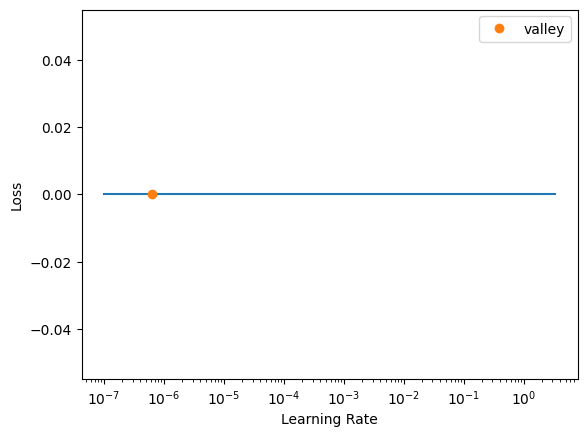

In [ ]:
from fastai.vision.all import *
import pandas as pd
from google.colab import files

def create_dataframe(train_images_path):
    label_func = lambda x: x.parent.name
    data = get_image_files(train_images_path).filter(lambda x: x.parent.name != 'test')
    df = pd.DataFrame({'path': data, 'label': list(map(label_func, data))})
    return df

def train_model(train_images_path, test_images_path, threshold):
    # 데이터프레임 생성
    df = create_dataframe(train_images_path)

    # 데이터 블록 및 augmentation 설정
    dblock = DataBlock(blocks=(ImageBlock, CategoryBlock),
                       splitter=RandomSplitter(valid_pct=0.2, seed=42),
                       get_x=ColReader('path'),
                       get_y=ColReader('label'),
                       item_tfms=Resize(224),
                       batch_tfms=aug_transforms())

    # 데이터 로더 생성
    dls = dblock.dataloaders(df, bs=16)

    # 학습 모델 생성
    learn = cnn_learner(dls, resnet50, metrics=accuracy)

    # 최적의 학습률 찾기
    lr_min, lr_steep = learn.lr_find()
    print(f"Minimum/10: {lr_min:.2e}, steepest point: {lr_steep:.2e}")

    # 학습률을 사용하여 모델 학습
    learn.fine_tune(15, base_lr=lr_min)

    # 테스트 데이터 평가
    test_files = get_image_files(test_images_path)
    test_dl = dls.test_dl(test_files)
    preds, _ = learn.get_preds(dl=test_dl)

    # 예측 라벨 조정
    adjusted_pred_labels = adjust_prediction(preds, threshold)

    # 조정된 테스트 결과 출력
    test_df_adjusted = pd.DataFrame({'path': test_files, 'predicted_label': adjusted_pred_labels})
    return test_df_adjusted

def adjust_prediction(preds, threshold):
    pred_labels = []
    for pred in preds:
        if pred[0] >= threshold:
            pred_labels.append('good')
        else:
            pred_labels.append('ng')
    return pred_labels

# 사용자 입력
train_images_path = input("Enter the path for training images: ")
test_images_path = input("Enter the path for test images: ")
threshold = float(input("Enter the threshold for classification (between 0 and 1): "))

# 모델 학습 및 테스트 결과
test_df_adjusted = train_model(train_images_path, test_images_path, threshold)
print(test_df_adjusted)


In [ ]:
from fastai.vision.all import *
import pandas as pd

def create_dataframe(train_images_path):
    label_func = lambda x: x.parent.name
    data = get_image_files(train_images_path).filter(lambda x: x.parent.name != 'test')
    df = pd.DataFrame({'path': data, 'label': list(map(label_func, data))})
    return df

def train_model(train_images_path, test_images_path, threshold):
    # 데이터프레임 생성
    df = create_dataframe(train_images_path)

    # 데이터 블록 및 augmentation 설정
    dblock = DataBlock(blocks=(ImageBlock, CategoryBlock),
                       splitter=RandomSplitter(valid_pct=0.2, seed=42),
                       get_x=ColReader('path'),
                       get_y=ColReader('label'),
                       item_tfms=Resize(224),  # 이미지 크기 줄이기
                       batch_tfms=aug_transforms())

    # 데이터 로더 생성
    dls = dblock.dataloaders(df, bs=16)  # 배치 크기 줄이기

    # 학습 모델 생성

    learn = cnn_learner(dls, resnet50, metrics=accuracy)



    # 학습률을 사용하여 모델 학습
    learn.fine_tune(15)

    # 테스트 데이터 평가
    test_files = get_image_files(test_images_path)
    test_dl = dls.test_dl(test_files)
    preds, _ = learn.get_preds(dl=test_dl)

    # 예측 라벨 조정
    adjusted_pred_labels = adjust_prediction(preds, threshold)

    # 조정된 테스트 결과 출력
    test_df_adjusted = pd.DataFrame({'path': test_files, 'predicted_label': adjusted_pred_labels})
    return test_df_adjusted

def adjust_prediction(preds, threshold):
    pred_labels = []
    for pred in preds:
        if pred[0] >= threshold:
            pred_labels.append('good')
        else:
            pred_labels.append('ng')
    return pred_labels

if __name__ == "__main__":
    # 사용자 입력
    train_images_path = input("Enter the path for training images: ")
    test_images_path = input("Enter the path for test images: ")
    threshold = float(input("Enter the threshold for classification (between 0 and 1): "))

    # 모델 학습 및 테스트 결과
    test_df_adjusted = train_model(train_images_path, test_images_path, threshold)
    print(test_df_adjusted)



Enter the path for training images: /content/drive/MyDrive/Colab Notebooks/10.cj_project/datasets/img_cls/fm_img/good
Enter the path for test images: /content/drive/MyDrive/Colab Notebooks/10.cj_project/datasets/img_cls/anomaly
Enter the threshold for classification (between 0 and 1): 0.7


/usr/local/lib/python3.9/dist-packages/fastai/vision/learner.py:288: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,accuracy,time
0,0.000000,0.000000,1.000000,00:02


epoch,train_loss,valid_loss,accuracy,time
0,0.000000,0.000000,1.000000,00:02
1,0.000000,0.000000,1.000000,00:02
2,0.000000,0.000000,1.000000,00:02
3,0.000000,0.000000,1.000000,00:02
4,0.000000,0.000000,1.000000,00:02
5,0.000000,0.000000,1.000000,00:02
6,0.000000,0.000000,1.000000,00:02
7,0.000000,0.000000,1.000000,00:02
8,0.000000,0.000000,1.000000,00:02
9,0.000000,0.000000,1.000000,00:02


                                                                                                      path  \
0              /content/drive/MyDrive/Colab Notebooks/10.cj_project/datasets/img_cls/anomaly/Snap-0194.jpg   
1              /content/drive/MyDrive/Colab Notebooks/10.cj_project/datasets/img_cls/anomaly/Snap-0182.jpg   
2              /content/drive/MyDrive/Colab Notebooks/10.cj_project/datasets/img_cls/anomaly/Snap-0121.jpg   
3              /content/drive/MyDrive/Colab Notebooks/10.cj_project/datasets/img_cls/anomaly/Snap-0122.jpg   
4  /content/drive/MyDrive/Colab Notebooks/10.cj_project/datasets/img_cls/anomaly/Snap-0481.jpg의 사본.jpg   
5  /content/drive/MyDrive/Colab Notebooks/10.cj_project/datasets/img_cls/anomaly/Snap-0482.jpg의 사본.jpg   
6  /content/drive/MyDrive/Colab Notebooks/10.cj_project/datasets/img_cls/anomaly/Snap-0483.jpg의 사본.jpg   

  predicted_label  
0            good  
1            good  
2            good  
3            good  
4            good  

In [ ]:
/content/drive/MyDrive/Colab Notebooks/10.cj_project/datasets/img_cls/fm_img/good

In [ ]:
/content/drive/MyDrive/Colab Notebooks/10.cj_project/datasets/img_cls/anomaly

In [ ]:
import torch
import torch.nn as nn
from fastai.vision.all import *
import pandas as pd
import PIL
from fastai.vision.utils import show_image
import matplotlib.pyplot as plt

# Autoencoder 모델 정의
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.decoder = nn.Sequential(
            nn.ConvTranspose2d(64, 32, kernel_size=2, stride=2),
            nn.ReLU(),
            nn.ConvTranspose2d(32, 3, kernel_size=2, stride=2),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# 데이터 로딩
def load_data(train_images_path):
    data_block = DataBlock(
        blocks=(ImageBlock, ImageBlock),
        get_items=get_image_files,
        splitter=RandomSplitter(valid_pct=0.2, seed=42),
        get_y=lambda x: x,
        batch_tfms=aug_transforms(size=(64, 64))  # 이미지 크기 변경
    )
    return data_block.dataloaders(train_images_path, bs=8, num_workers=0)  # 배치 크기 변경

# 모델 학습
def train_autoencoder(train_images_path):
    dls = load_data(train_images_path)
    model = Autoencoder()
    learn = Learner(dls, model, loss_func=MSELossFlat(), cbs=[ShowGraphCallback()])
    learn.fit_one_cycle(10, 1e-3)
    return learn

# 이미지 재구성 및 임계값 설정
# 이미지 재구성 및 임계값 설정
# def detect_anomalies(learn, test_images_path, threshold):
#     test_files = get_image_files(test_images_path)
#     anomalies = []
#     device = learn.model.decoder.parameters().__next__().device  # GPU 장치 가져오기
#     for img_path in test_files:
#         img = PIL.Image.open(img_path).convert('RGB')
#         img_fastai = img.resize((64, 64))  # 이미지 크기 변경
#         img_array = np.array(img_fastai)
#         img_tensor = tensor(img_array).permute(2,0,1).float() / 255.
#         img_tensor = img_tensor.to(device)  # 텐서를 GPU로 옮기기
#         with torch.no_grad():
#             reconstruction = learn.model(img_tensor.unsqueeze(0))
#         reconstruction_loss = F.mse_loss(reconstruction, img_tensor.unsqueeze(0)).item()
#         if reconstruction_loss > threshold:
#             anomalies.append(img_path)
#     return anomalies

def detect_anomalies(learn, test_images_path, threshold):
    test_files = get_image_files(test_images_path)
    anomalies = []
    device = learn.model.decoder.parameters().__next__().device
    for img_path in test_files:
        img = PIL.Image.open(img_path).convert('RGB')
        img_fastai = img.resize((64, 64))
        img_array = np.array(img_fastai)
        img_tensor = tensor(img_array).permute(2,0,1).float() / 255.
        img_tensor = img_tensor.to(device)
        with torch.no_grad():
            reconstruction = learn.model(img_tensor.unsqueeze(0))
        reconstruction_loss = F.mse_loss(reconstruction, img_tensor.unsqueeze(0)).item()
        if reconstruction_loss > threshold:
            anomalies.append((img_path, reconstruction_loss, img))
    return anomalies

def show_anomalies(anomalies, figsize=(12, 12)):
    n_images = len(anomalies)
    fig, axes = plt.subplots(n_images, 1, figsize=figsize)
    for ax, (img_path, loss, img) in zip(axes.flat, anomalies):
        show_image(img, ax=ax)
        ax.set_title(f"{img_path.name} - Reconstruction loss: {loss:.5f}")
    plt.tight_layout()
    plt.show()

epoch,train_loss,valid_loss,time
0,0.077498,0.076454,00:03
1,0.075149,0.069502,00:03
2,0.068787,0.053871,00:03
3,0.062348,0.044439,00:03
4,0.056466,0.037229,00:03
5,0.050572,0.030140,00:03
6,0.044906,0.024756,00:03
7,0.039734,0.021811,00:03
8,0.035442,0.020680,00:03
9,0.032275,0.020507,00:03


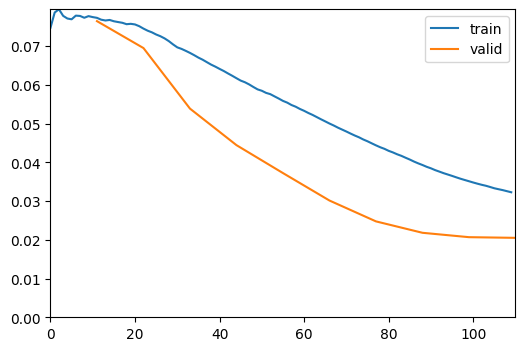

Detected anomalies: 7
(Path('/content/drive/MyDrive/Colab Notebooks/10.cj_project/datasets/img_cls/anomaly/Snap-0182.jpg'), 0.0205349400639534, <PIL.Image.Image image mode=RGB size=982x786>)
(Path('/content/drive/MyDrive/Colab Notebooks/10.cj_project/datasets/img_cls/anomaly/Snap-0121.jpg'), 0.020666714757680893, <PIL.Image.Image image mode=RGB size=982x786>)
(Path('/content/drive/MyDrive/Colab Notebooks/10.cj_project/datasets/img_cls/anomaly/Snap-0122.jpg'), 0.02073400653898716, <PIL.Image.Image image mode=RGB size=982x786>)
(Path('/content/drive/MyDrive/Colab Notebooks/10.cj_project/datasets/img_cls/anomaly/Snap-0481.jpg의 사본.jpg'), 0.027104496955871582, <PIL.Image.Image image mode=RGB size=982x786>)
(Path('/content/drive/MyDrive/Colab Notebooks/10.cj_project/datasets/img_cls/anomaly/Snap-0482.jpg의 사본.jpg'), 0.027091071009635925, <PIL.Image.Image image mode=RGB size=982x786>)
(Path('/content/drive/MyDrive/Colab Notebooks/10.cj_project/datasets/img_cls/anomaly/Snap-0483.jpg의 ᄉ

In [ ]:
train_images_path = '/content/drive/MyDrive/Colab Notebooks/10.cj_project/datasets/img_cls/fm_img/good'
test_images_path = '/content/drive/MyDrive/Colab Notebooks/10.cj_project/datasets/img_cls/anomaly'
learn = train_autoencoder(train_images_path)
anomalies = detect_anomalies(learn, test_images_path, threshold=0.02)

print(f"Detected anomalies: {len(anomalies)}")
for anomaly in anomalies:
    print(anomaly)

In [ ]:
anomalies = detect_anomalies(learn, test_images_path, threshold=0.02)

print(f"Detected anomalies: {len(anomalies)}")
for anomaly in anomalies:
    print(anomaly)

Detected anomalies: 7
(Path('/content/drive/MyDrive/Colab Notebooks/10.cj_project/datasets/img_cls/anomaly/Snap-0182.jpg'), 0.0205349400639534, <PIL.Image.Image image mode=RGB size=982x786>)
(Path('/content/drive/MyDrive/Colab Notebooks/10.cj_project/datasets/img_cls/anomaly/Snap-0121.jpg'), 0.020666714757680893, <PIL.Image.Image image mode=RGB size=982x786>)
(Path('/content/drive/MyDrive/Colab Notebooks/10.cj_project/datasets/img_cls/anomaly/Snap-0122.jpg'), 0.02073400653898716, <PIL.Image.Image image mode=RGB size=982x786>)
(Path('/content/drive/MyDrive/Colab Notebooks/10.cj_project/datasets/img_cls/anomaly/Snap-0481.jpg의 사본.jpg'), 0.027104496955871582, <PIL.Image.Image image mode=RGB size=982x786>)
(Path('/content/drive/MyDrive/Colab Notebooks/10.cj_project/datasets/img_cls/anomaly/Snap-0482.jpg의 사본.jpg'), 0.027091071009635925, <PIL.Image.Image image mode=RGB size=982x786>)
(Path('/content/drive/MyDrive/Colab Notebooks/10.cj_project/datasets/img_cls/anomaly/Snap-0483.jpg의 ᄉ

Detected anomalies: 7


<ipython-input-3-b25041b79172>:94: UserWarning: Glyph 4363 (\N{HANGUL CHOSEONG IEUNG}) missing from current font.
  plt.tight_layout()
<ipython-input-3-b25041b79172>:94: UserWarning: Glyph 4468 (\N{HANGUL JUNGSEONG YI}) missing from current font.
  plt.tight_layout()
<ipython-input-3-b25041b79172>:94: UserWarning: Glyph 4361 (\N{HANGUL CHOSEONG SIOS}) missing from current font.
  plt.tight_layout()
<ipython-input-3-b25041b79172>:94: UserWarning: Glyph 4449 (\N{HANGUL JUNGSEONG A}) missing from current font.
  plt.tight_layout()
<ipython-input-3-b25041b79172>:94: UserWarning: Glyph 4359 (\N{HANGUL CHOSEONG PIEUP}) missing from current font.
  plt.tight_layout()
<ipython-input-3-b25041b79172>:94: UserWarning: Glyph 4457 (\N{HANGUL JUNGSEONG O}) missing from current font.
  plt.tight_layout()
<ipython-input-3-b25041b79172>:94: UserWarning: Glyph 4523 (\N{HANGUL JONGSEONG NIEUN}) missing from current font.
  plt.tight_layout()


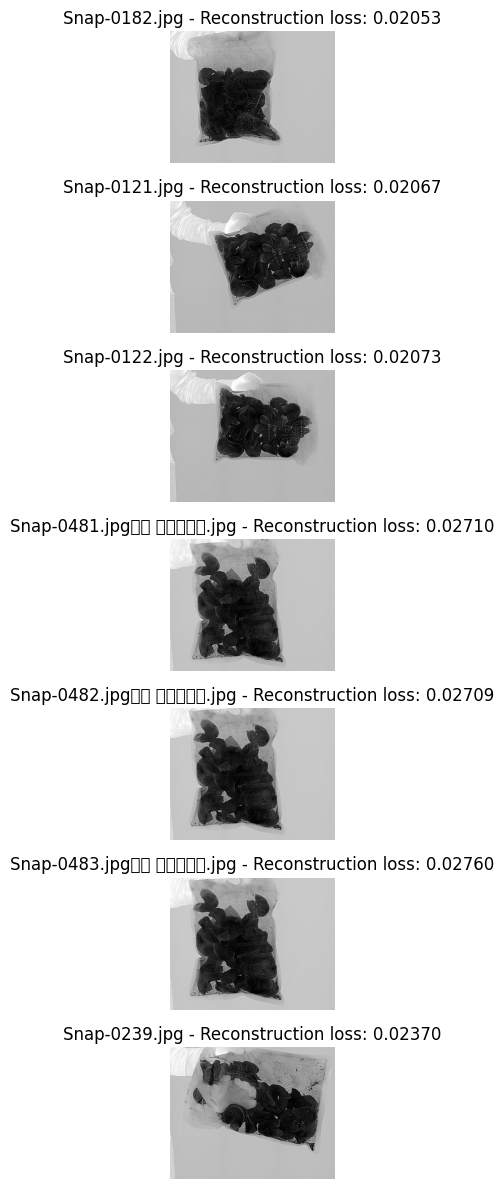

In [ ]:
anomalies = detect_anomalies(learn, test_images_path, threshold=0.02)
print(f"Detected anomalies: {len(anomalies)}")
show_anomalies(anomalies)

# Isolation Forest

In [ ]:
import numpy as np
import os
import cv2
from sklearn.ensemble import IsolationForest
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input



# Load and preprocess images
def load_images(image_folder, target_size=(224, 224)):
    images = []
    for filename in os.listdir(image_folder):
        img_path = os.path.join(image_folder, filename)
        img = cv2.imread(img_path)
        img = cv2.resize(img, target_size)
        img = preprocess_input(img)
        images.append(img)
    return np.array(images)

# Feature extraction using pre-trained ResNet50
def extract_features(images):
    model = ResNet50(weights=None, include_top=False, pooling='avg')
    features = model.predict(images)
    return features

# Load data
normal_images_path = '/content/drive/MyDrive/Colab Notebooks/10.cj_project/datasets/img_cls/fm_img/good'
anomaly_images_path = '/content/drive/MyDrive/Colab Notebooks/10.cj_project/datasets/img_cls/fm_img/ng'

normal_images = load_images(normal_images_path)
anomaly_images = load_images(anomaly_images_path)
all_images = np.concatenate([normal_images, anomaly_images], axis=0)

# Extract features
features = extract_features(all_images)

# Fit the Isolation Forest model
clf = IsolationForest(contamination=0.05)
clf.fit(features[:len(normal_images)])  # Train on normal images only

# Make predictions
predictions = clf.predict(features)

# Evaluate the results
normal_preds = predictions[:len(normal_images)]
anomaly_preds = predictions[len(normal_images):]

normal_correct = np.sum(normal_preds == 1)
anomaly_correct = np.sum(anomaly_preds == -1)

print(f"Normal images correctly classified: {normal_correct}/{len(normal_images)}")
print(f"Anomaly images correctly classified: {anomaly_correct}/{len(anomaly_images)}")


18/18 [==============================] - 2s 87ms/step
Normal images correctly classified: 104/110
Anomaly images correctly classified: 242/440


In [ ]:
eval_images_path = '/content/drive/MyDrive/Colab Notebooks/10.cj_project/datasets/img_cls/anomaly'
eval_images = load_images(eval_images_path)

eval_features = extract_features(eval_images)
eval_predictions = clf.predict(eval_features)

eval_correct = np.sum(eval_predictions == -1)
print(f"Anomaly evaluation images correctly classified: {eval_correct}/{len(eval_images)}")




1/1 [==============================] - 1s 823ms/step
Anomaly evaluation images correctly classified: 9/9


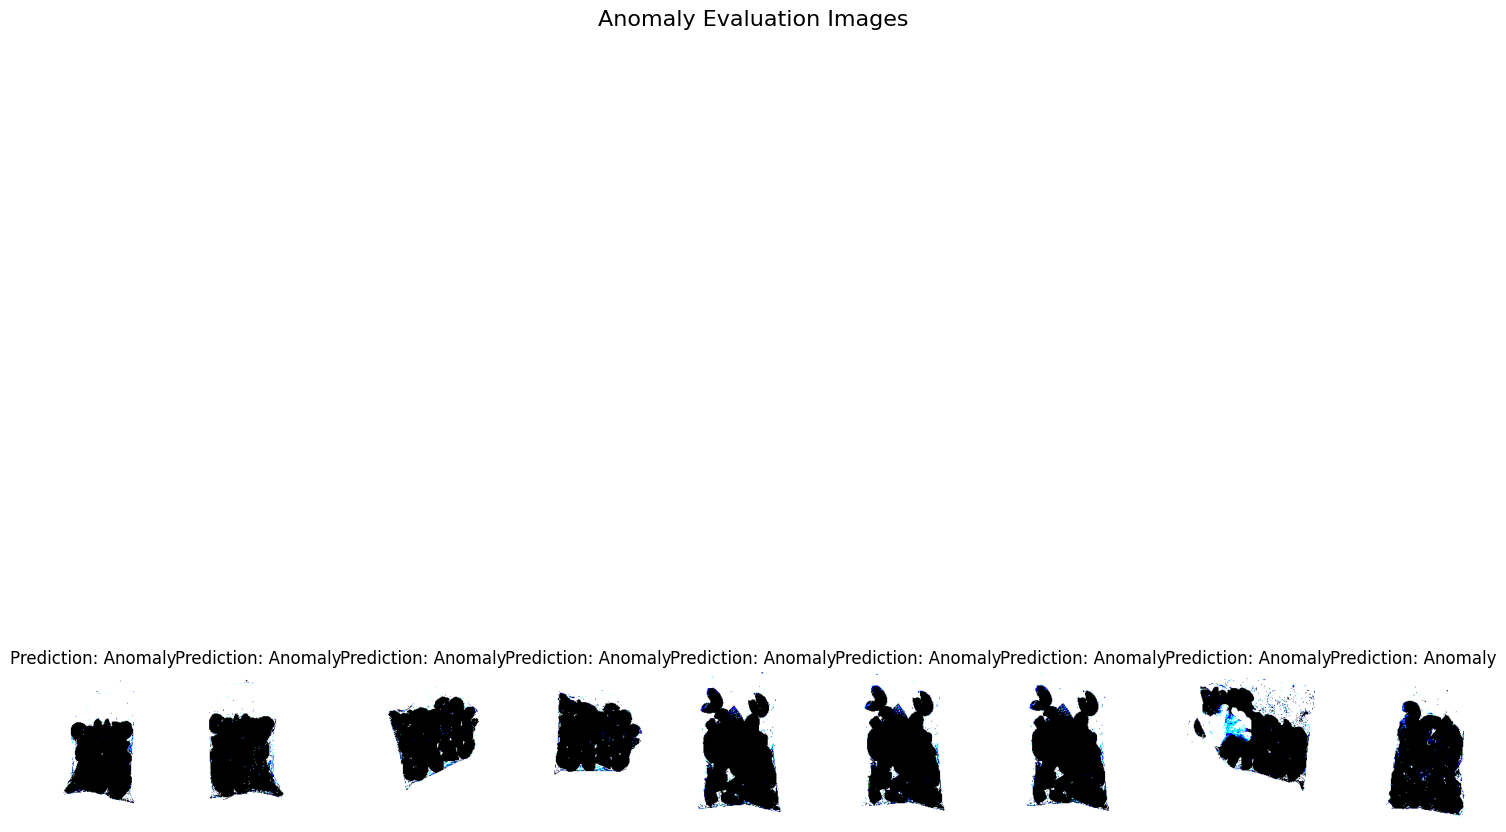

In [ ]:
 import matplotlib.pyplot as plt

def display_images(images, predictions, title):
    fig, axes = plt.subplots(1, len(images), figsize=(15, 15))
    fig.suptitle(title, fontsize=16)

    for idx, (img, pred) in enumerate(zip(images, predictions)):
        if len(images) == 1:
            ax = axes
        else:
            ax = axes[idx]
        ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        ax.set_title(f"Prediction: {'Anomaly' if pred == -1 else 'Normal'}")
        ax.axis('off')

    plt.tight_layout()
    plt.show()

display_images(eval_images, eval_predictions, "Anomaly Evaluation Images")


1/1 [==============================] - 2s 2s/step
Anomaly test images correctly classified: 9/9


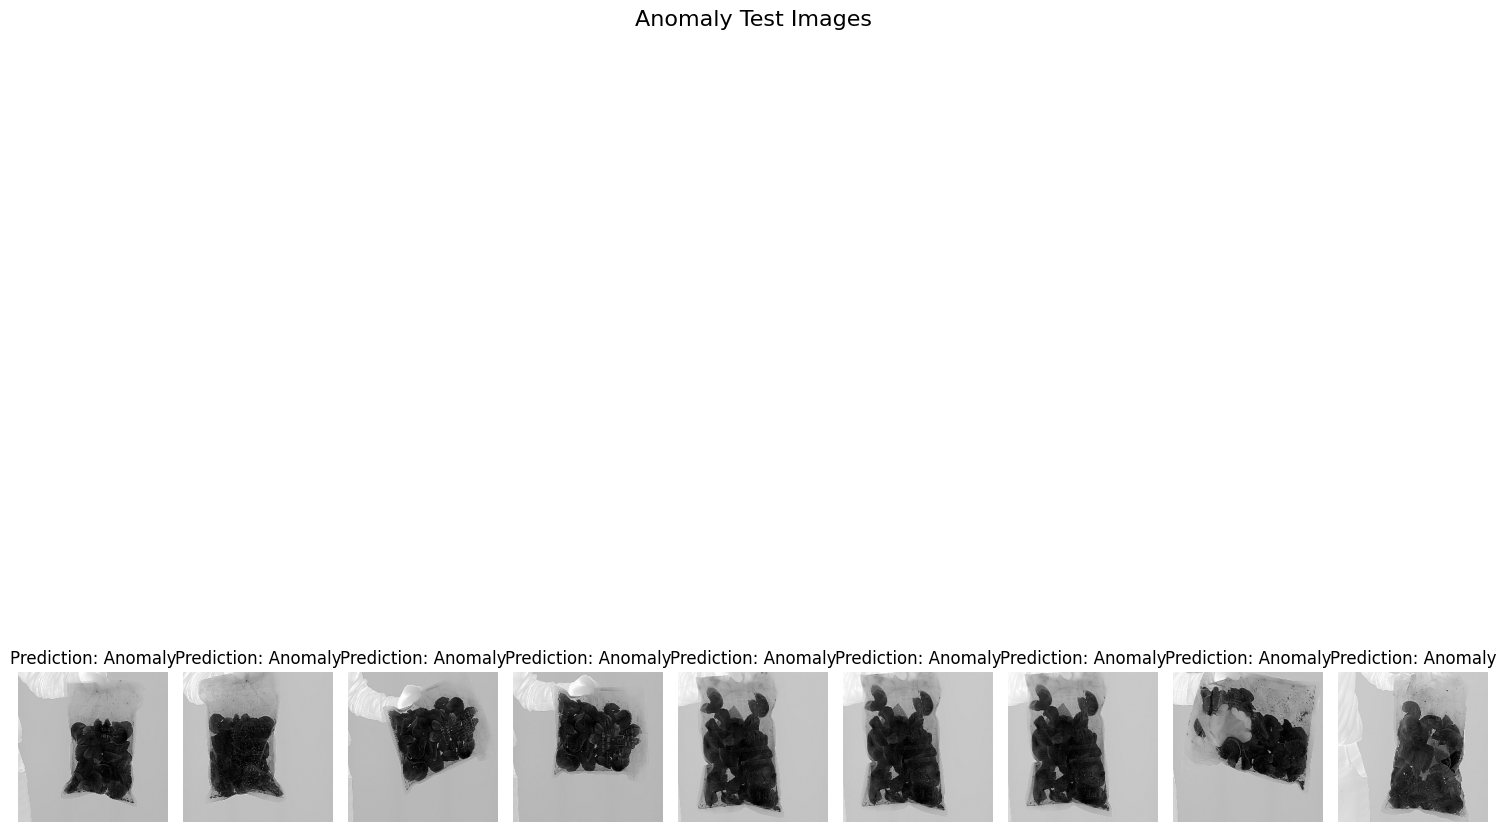

In [ ]:
import os
import cv2
import numpy as np
from sklearn.ensemble import IsolationForest
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model

# Load images from a folder
def load_images(image_folder, target_size=(224, 224)):
    images = []
    for filename in os.listdir(image_folder):
        img_path = os.path.join(image_folder, filename)
        img = cv2.imread(img_path)
        img = cv2.resize(img, target_size)
        images.append(img)
    return np.array(images)

# Feature extraction using VGG16 pre-trained model
def extract_features(images):
    base_model = VGG16(weights=None, include_top=True)
    model = Model(inputs=base_model.input, outputs=base_model.get_layer('fc2').output)
    images = preprocess_input(images)
    features = model.predict(images)
    return features

train_images_path = '/content/drive/MyDrive/Colab Notebooks/10.cj_project/datasets/img_cls/fm_img/good'
train_images = load_images(train_images_path)

train_features = extract_features(train_images)

clf = IsolationForest(contamination=0.1)
clf.fit(train_features)

# Now you can use the trained model to make predictions on test images
test_images_path = '/content/drive/MyDrive/Colab Notebooks/10.cj_project/datasets/img_cls/anomaly'
test_images = load_images(test_images_path)

test_features = extract_features(test_images)
test_predictions = clf.predict(test_features)

test_correct = np.sum(test_predictions == -1)
print(f"Anomaly test images correctly classified: {test_correct}/{len(test_images)}")

# Display test images and their results
display_images(test_images, test_predictions, "Anomaly Test Images")


# 앙상블

In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import VGG16, ResNet50
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, GlobalAveragePooling2D, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import Accuracy

import matplotlib.pyplot as plt

In [ ]:
def load_images(image_folder, target_size=(224, 224)):
    images = []
    labels = []
    for subdir, dirs, files in os.walk(image_folder):
        for filename in files:
            img_path = os.path.join(subdir, filename)
            img = cv2.imread(img_path)
            img = cv2.resize(img, target_size)
            img = img.astype('float32') / 255.0
            images.append(img)
            labels.append(os.path.basename(subdir))
    return np.array(images), np.array(labels)

def extract_features(images):
    base_model = ResNet50(weights=None, include_top=False, input_shape=(224, 224, 3))
    features = base_model.predict(images)
    return features


In [ ]:
# Replace these paths with the paths to your datasets
good_images_path = '/content/drive/MyDrive/Colab Notebooks/10.cj_project/datasets/img_cls/fm_img/good'
ng_images_path = '/content/drive/MyDrive/Colab Notebooks/10.cj_project/datasets/img_cls/fm_img/ng'

good_images, good_labels = load_images(good_images_path)
ng_images, ng_labels = load_images(ng_images_path)

all_images = np.concatenate([good_images, ng_images], axis=0)
all_labels = np.concatenate([good_labels, ng_labels], axis=0)

# Convert labels to binary format (0 for good, 1 for ng)
label_map = {'good': 0, 'ng': 1}
binary_labels = np.vectorize(label_map.get)(all_labels)

X_train, X_val, y_train, y_val = train_test_split(all_images, binary_labels, test_size=0.2, random_state=42)


In [ ]:
#Create the classification model using Resnet50 as the base model
def create_classification_model():
    input_tensor = Input(shape=(224, 224, 3))
    base_model = ResNet50(weights=None, include_top=False, input_tensor=input_tensor)
    x = Flatten()(base_model.output)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)
    output_tensor = Dense(1, activation='sigmoid')(x)

    model = Model(inputs=input_tensor, outputs=output_tensor)
    model.layers[1].trainable = False

    model.compile(optimizer=Adam(lr=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

    return model
# def create_classification_model():
#     base_model = EfficientNetB0(weights=None, include_top=False, input_shape=(224, 224, 3))

#     # Freeze the base model layers
#     for layer in base_model.layers:
#         layer.trainable = False

#     # Add new layers for classification
#     x = base_model.output
#     x = GlobalAveragePooling2D()(x)
#     x = Dense(256, activation='relu')(x)
#     x = Dropout(0.5)(x)
#     predictions = Dense(1, activation='sigmoid')(x)

#     model = Model(inputs=base_model.input, outputs=predictions)

#     model.compile(optimizer=Adam(lr=1e-4), loss=BinaryCrossentropy(), metrics=[Accuracy()])

#     return model

# Train the classification model
class_model = create_classification_model()

train_datagen = ImageDataGenerator(rotation_range=15, width_shift_range=0.1, height_shift_range=0.1, shear_range=0.1, zoom_range=0.1, horizontal_flip=True, fill_mode='nearest')




train_datagen.fit(X_train)

history = class_model.fit(train_datagen.flow(X_train, y_train, batch_size=16), epochs=20, validation_data=(X_val, y_val), verbose=2)



# Extract features from the normal images using ResNet50
base_model = ResNet50(weights=None, include_top=False, input_shape=(224, 224, 3))
good_features = base_model.predict(good_images)
good_features_flat = good_features.reshape(good_features.shape[0], -1)

# Train the Isolation Forest model
scaler = StandardScaler()
scaled_good_features = scaler.fit_transform(good_features_flat)

anomaly_model = IsolationForest(contamination=0.1, random_state=42)
anomaly_model.fit(scaled_good_features)



def ensemble_predict(images, class_model, anomaly_model, scaler):
    base_model = ResNet50(weights=None, include_top=False, input_shape=(224, 224, 3))
    features = base_model.predict(images)

    class_prob = class_model.predict(images)[:, 0]
    reshaped_features = features.reshape(features.shape[0], -1)
    anomaly_score = anomaly_model.decision_function(reshaped_features)
    scaled_anomaly_score = scaler.transform(anomaly_score.reshape(-1, 1))[:, 0]

    ensemble_pred = np.where(class_prob > 0.5, 1 - scaled_anomaly_score, scaled_anomaly_score)
    binary_pred = np.where(ensemble_pred > 0.5, 1, 0)

    return binary_pred



import matplotlib.pyplot as plt

def plot_loss_and_accuracy(history):
    # Plot loss
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

# Assuming you have already trained your model and stored the history
# For example:
# history = model.fit(train_data, train_labels, epochs=20, validation_split=0.2)

# Then you can plot the graphs using the function:
# plot_loss_and_accuracy(history)

plot_loss_and_accuracy(history)

IndexError: ignored

In [ ]:
test_images_path = '/content/drive/MyDrive/Colab Notebooks/10.cj_project/datasets/img_cls/anomaly'

test_images, test_labels = load_images(test_images_path)
test_binary_labels = np.vectorize(label_map.get)(test_labels)

ensemble_predictions = ensemble_predict(test_images, class_model, anomaly_model, scaler)

correct_predictions = np.sum(ensemble_predictions == test_binary_labels)
print(f"Ensemble model correctly classified: {correct_predictions}/{len(test_images)}")


1/1 [==============================] - 1s 916ms/step


ValueError: ignored

# gpt

In [ ]:
import os
import pandas as pd
from PIL import Image
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
def load_images(image_folder, target_size=(224, 224)):
    images = []
    labels = []

    for root, dirs, files in os.walk(image_folder):
        if 'good' in root or 'ng' in root:
            for file in files:
                if file.endswith('jpg') or file.endswith('.png'):
                    images.append(os.path.join(root, file))
                    labels.append('good' if 'good' in root else 'ng')

    data = pd.DataFrame({'image': images, 'label': labels})
    return data


In [ ]:
good_images_path = '/content/drive/MyDrive/Colab Notebooks/10.cj_project/datasets/img_cls/fm_img/good'
ng_images_path = '/content/drive/MyDrive/Colab Notebooks/10.cj_project/datasets/img_cls/fm_img/ng'


good_data = load_images(good_images_path)
ng_data = load_images(ng_images_path)

all_data = pd.concat([good_data, ng_data], ignore_index=True)

label_map = {'good': 0, 'ng': 1}
all_data['binary_label'] = all_data['label'].map(label_map)
# train_data, val_data = train_test_split(all_data, test_size=0.2, random_state=42, stratify=all_data['binary_label'])

all_data['binary_label'] = all_data['binary_label'].astype(str)
train_data, val_data = train_test_split(all_data, test_size=0.2, random_state=42, stratify=all_data['binary_label'])



In [ ]:

train_data

,image,label,binary_label
294,/content/drive/MyDrive/Colab Notebooks/10.cj_p...,ng,1
33,/content/drive/MyDrive/Colab Notebooks/10.cj_p...,good,0
202,/content/drive/MyDrive/Colab Notebooks/10.cj_p...,ng,1
117,/content/drive/MyDrive/Colab Notebooks/10.cj_p...,ng,1
324,/content/drive/MyDrive/Colab Notebooks/10.cj_p...,ng,1
...,...,...,...
375,/content/drive/MyDrive/Colab Notebooks/10.cj_p...,ng,1
133,/content/drive/MyDrive/Colab Notebooks/10.cj_p...,ng,1
159,/content/drive/MyDrive/Colab Notebooks/10.cj_p...,ng,1
168,/content/drive/MyDrive/Colab Notebooks/10.cj_p...,ng,1


In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=5,
                                   width_shift_range=0.05,
                                   height_shift_range=0.05,
                                   shear_range=0.05,
                                   zoom_range=0.05,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(dataframe=train_data,
                                                    x_col="image",
                                                    y_col="binary_label",
                                                    target_size=(224, 224),
                                                    batch_size=16,
                                                    class_mode="binary")

val_generator = val_datagen.flow_from_dataframe(dataframe=val_data,
                                                x_col="image",
                                                y_col="binary_label",
                                                target_size=(224, 224),
                                                batch_size=16,
                                                class_mode="binary")


Found 333 validated image filenames belonging to 2 classes.
Found 84 validated image filenames belonging to 2 classes.


In [ ]:
def create_classification_model():
    input_tensor = Input(shape=(224, 224, 3))
    base_model = ResNet50(weights=None, include_top=False, input_tensor=input_tensor)
    x = Flatten()(base_model.output)
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)
    output_tensor = Dense(1, activation='sigmoid')(x)

    model = Model(inputs=input_tensor, outputs=output_tensor)
    model.layers[1].trainable = False

    model.compile(optimizer=Adam(lr=1e-4), loss='binary_crossentropy', metrics=['accuracy'], run_eagerly=True)

    return model


class_model = create_classification_model()


In [ ]:
history = class_model.fit(train_generator, epochs=10, validation_data=val_generator, verbose=1)

Epoch 1/10
21/21 [==============================] - 17s 790ms/step - loss: 31.7754 - accuracy: 0.6547 - val_loss: 20.1477 - val_accuracy: 0.7381
Epoch 2/10
21/21 [==============================] - 17s 792ms/step - loss: 17.2030 - accuracy: 0.6006 - val_loss: 3.5579 - val_accuracy: 0.7381
Epoch 3/10
21/21 [==============================] - 17s 776ms/step - loss: 5.1682 - accuracy: 0.5766 - val_loss: 4.3444 - val_accuracy: 0.7381
Epoch 4/10
21/21 [==============================] - 17s 785ms/step - loss: 2.7453 - accuracy: 0.6517 - val_loss: 0.6630 - val_accuracy: 0.7381
Epoch 5/10
21/21 [==============================] - 17s 783ms/step - loss: 0.7022 - accuracy: 0.6336 - val_loss: 0.5759 - val_accuracy: 0.7381
Epoch 6/10
21/21 [==============================] - 16s 774ms/step - loss: 2.2706 - accuracy: 0.6306 - val_loss: 0.5845 - val_accuracy: 0.7381
Epoch 7/10
21/21 [==============================] - 17s 776ms/step - loss: 0.6148 - accuracy: 0.7147 - val_loss: 0.6034 - val_accuracy: 0.7

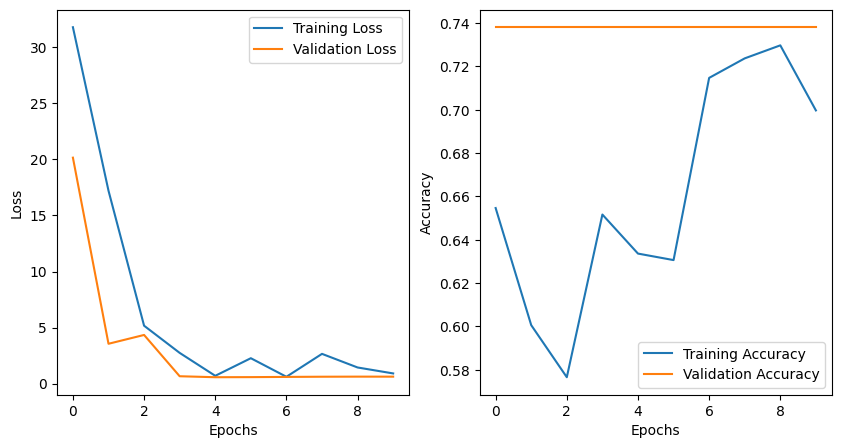

In [ ]:
import matplotlib.pyplot as plt

def plot_loss_and_accuracy(history):
    # Plot loss
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.show()

# Assuming you have already trained your model and stored the history
# For example:
# history = model.fit(train_data, train_labels, epochs=20, validation_split=0.2)

# Then you can plot the graphs using the function:
# plot_loss_and_accuracy(history)

plot_loss_and_accuracy(history)

In [ ]:
good_image_list = [np.array(Image.open(img_path).convert('RGB').resize((224, 224)), dtype=np.float32) / 255.0 for img_path in good_data['image']]
good_images = np.array(good_image_list)

base_model = ResNet50(weights=None, include_top=False, input_shape=(224, 224, 3))
good_features = base_model.predict(good_images)
good_features_flat = good_features.reshape(good_features.shape[0], -1)




4/4 [==============================] - 1s 109ms/step


In [ ]:

scaler = StandardScaler()
scaled_good_features = scaler.fit_transform(good_features_flat)

anomaly_model = IsolationForest(contamination=0.1, random_state=42)
anomaly_model.fit(scaled_good_features)

IsolationForest(contamination=0.1, random_state=42)

In [ ]:
def ensemble_predict(images, class_model):
    base_model = ResNet50(weights=None, include_top=False, input_shape=(224, 224, 3))
    features = base_model.predict(images)

    class_prob = class_model.predict(images)[:, 0]

    ensemble_pred = np.where(class_prob > 0.5, 1, 0)

    return ensemble_pred

test_images_path = '/content/drive/MyDrive/Colab Notebooks/10.cj_project/datasets/img_cls/anomaly'

test_data = load_images(test_images_path)
test_data['binary_label'] = test_data['label'].map(label_map)

test_image_list = [np.array(img) / 255.0 for img in test_data['image']]
test_images = np.array(test_image_list)

ensemble_predictions = ensemble_predict(test_images, class_model)

correct_predictions = np.sum(ensemble_predictions == test_data['binary_label'].values)
print(f"Ensemble model correctly classified: {correct_predictions}/{len(test_images)}")



/usr/local/lib/python3.9/dist-packages/tensorflow/python/data/ops/structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


ValueError: ignored